In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from examples import *
import numpy as np
import dionysus as d
from tdafunction import *
import copy


Load the given triangulation of $\mathbb{CP}^2$ blown up at one point and construct a filtered simplicial complex.

In [ ]:
value = 6
fsimplices = []
for fspx in cp2blowcp2:
    fsimplices.append((list(fspx), len(fspx)-1))
f = d.Filtration(fsimplices)
cm = d.cohomology_persistence(f,prime=2)
cdgms = d.init_diagrams(cm,f)

Find the first and second Stiefel-Whitney classes.

In [3]:
sw1 = sw_class(f,1,4,value)
sw2 = sw_class(f,2,4,value)

idx1 = kth_longest_index(cdgms, 2, 1)
idx2 = kth_longest_index(cdgms, 2, 2)

cob_mat1 = coboundary_matrix(f,1)
cob_mat2 = coboundary_matrix(f,2)

cocycle1 = get_cocycles(cm,f,cdgms,2,idx1)
cocycle2 = get_cocycles(cm,f,cdgms,2,idx2)
cocycle3 = sum_cocycles([cocycle1,cocycle2])

In [4]:
zero_cohomologous(cob_mat1, sw1)

True

In [5]:
is_cohomologous(cob_mat2, sw2, cocycle3)

True

In [ ]:
# construct the cone of the manifold at infinity value to visulize the barcodes
cone_fsimplices = copy.deepcopy(fsimplices)
cone_fsimplices.append(([0],9))
for fspx in cp2blowcp2:
    cone_fsimplices.append(([0]+list(fspx),9))
cone_f = d.Filtration(cone_fsimplices)
cone_cm = d.cohomology_persistence(cone_f,prime=2)
cone_cdgms1 = d.init_diagrams(cone_cm,cone_f)

Load the given triangulation of $S^2 \times S^2$ blown up at one point and construct a filtered simplicial complex.

In [7]:
value = 6
fsimplices = []
for fspx in s2xs2:
    fsimplices.append((list(fspx), len(fspx)-1))
f = d.Filtration(fsimplices)
cm = d.cohomology_persistence(f,prime=2)
cdgms = d.init_diagrams(cm,f)

Find the first and second Stiefel-Whitney classes.

In [8]:
sw1 = sw_class(f,1,4,value)
sw2 = sw_class(f,2,4,value)

In [9]:
cob_mat1 = coboundary_matrix(f,1)
cob_mat2 = coboundary_matrix(f,2)

Stiefel-Whitney classes of $S^2 \times S^2$

In [10]:
zero_cohomologous(cob_mat1, sw1)

True

In [11]:
zero_cohomologous(cob_mat2, sw2)

True

In [13]:
# construct the cone of the manifold at infinity value to visulize the barcodes
cone_fsimplices = copy.deepcopy(fsimplices)
cone_fsimplices.append(([-1],9))
for fspx in s2xs2:
    cone_fsimplices.append(([-1]+list(fspx),9))
cone_f = d.Filtration(cone_fsimplices)
cone_cm = d.cohomology_persistence(cone_f,prime=2)
cone_cdgms2 = d.init_diagrams(cone_cm,cone_f)

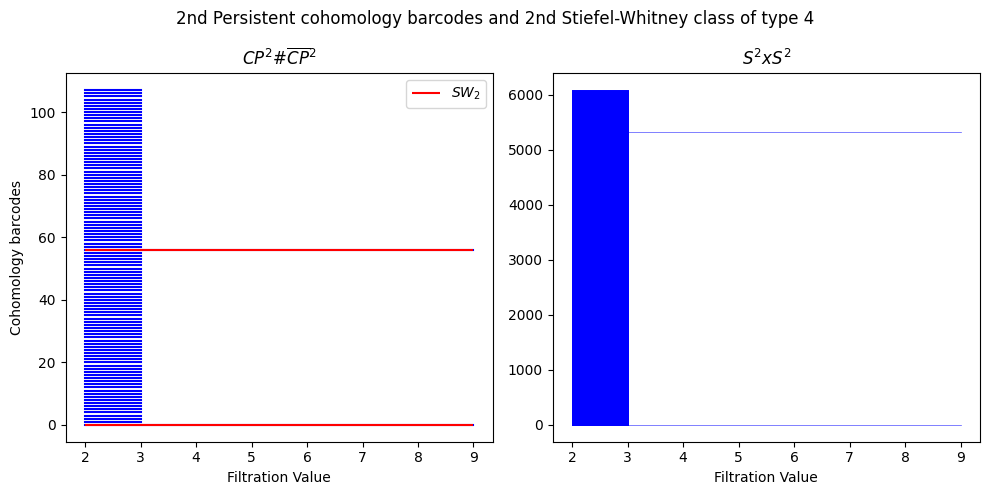

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
d.plot.plot_bars(cone_cdgms1[2],ax=axes[0])
axes[0].hlines(np.array([idx1,idx2]),2,9,colors="red",label="$SW_2$")
axes[0].set_title("$CP^2 \# \overline{CP}^2$")
axes[0].set_xlabel('Filtration Value')
axes[0].set_ylabel('Cohomology barcodes')
axes[0].legend()
d.plot.plot_bars(cone_cdgms2[2],ax=axes[1],lw=0.5,alpha=0.7)
axes[1].set_title("$S^2 x S^2$")
axes[1].set_xlabel('Filtration Value')
fig.suptitle("2nd Persistent cohomology barcodes and 2nd Stiefel-Whitney class of type 4")
fig.tight_layout()
plt.show()